# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
org_df = pd.read_excel("C:/Users/Joshua Ayodele/Downloads/archive (2)/train.xlsx")
alt_df = pd.read_csv("C:/Users/Joshua Ayodele/Downloads/archive (3)/BrentOilPrices.csv")

## Description of datasets:
For this project, I used the Airface Prediction dataset alongside the Brent Oil Prices dataset. The Airface Prediction dataset contains information about different airlines such as departure time,date of journey, and price. The purpose of this dataset is for the user to select specific variables that could lead to an accurate price prediction. The Brent Oil Prices dataset is a collection of oil prices over the years dating back to the year 1987. I used this dataset as an alternative because I believed it could be a significant factor when determining prices during certain months. Planes use oil for fuel and if the price of the oil increases, this should in turn increase the cost of fuel. This would further increase the price of a flight as they airline has to pay more for fuel. 
### Questions about datasets:
    1. Are there any null variables within either dataset?
    2. If there are any null varibales, where are they located and how should I go about dealing with this issue?
    3. What varibles are present within the dataset and how should they be classified?

### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

In [3]:
org_df.head()
#First question that came to my mind while handling this data is how I should deal with variables such as route and dep_time.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303


In [4]:
org_df["journey_date"] = org_df["Date_of_Journey"]
org_df = org_df.drop("Date_of_Journey", 1)

C:\Users\JOSHUA~1\AppData\Local\Temp/ipykernel_18160/3192686544.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  org_df = org_df.drop("Date_of_Journey", 1)


In [5]:
org_df.isna().any().any()
#Checking to see if there are any missing values in the Airfare Prediction dataset. Unfortunately, there are.

True

In [6]:
missing = org_df.isnull().sum()
missing

Airline            0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional Info    0
Price              0
journey_date       0
dtype: int64

In [7]:
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  journey_date     10683 non-null  object
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
org_df.describe()

,Price
count,10683.000000
mean,9088.064121
std,4611.359167
min,1760.000000
25%,5278.000000
50%,8373.000000
75%,12374.000000
max,79513.000000


In [9]:
alt_df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [10]:
alt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8554 entries, 0 to 8553
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8554 non-null   object 
 1   Price   8554 non-null   float64
dtypes: float64(1), object(1)
memory usage: 133.8+ KB


In [11]:
alt_df.describe()

,Price
count,8554.000000
mean,46.352962
std,32.165282
min,9.100000
25%,18.850000
50%,33.240000
75%,66.210000
max,143.950000


In [12]:
alt_df.isna().any().any()
#Fortunately, no null values were found in the Oil dataset.

False

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

In [13]:
org_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,journey_date
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898,24/03/2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663,1/05/2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883,9/06/2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219,12/05/2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303,01/03/2019


In [14]:
alt_df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [15]:
org_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [16]:
org_df['Airline'].nunique()

12

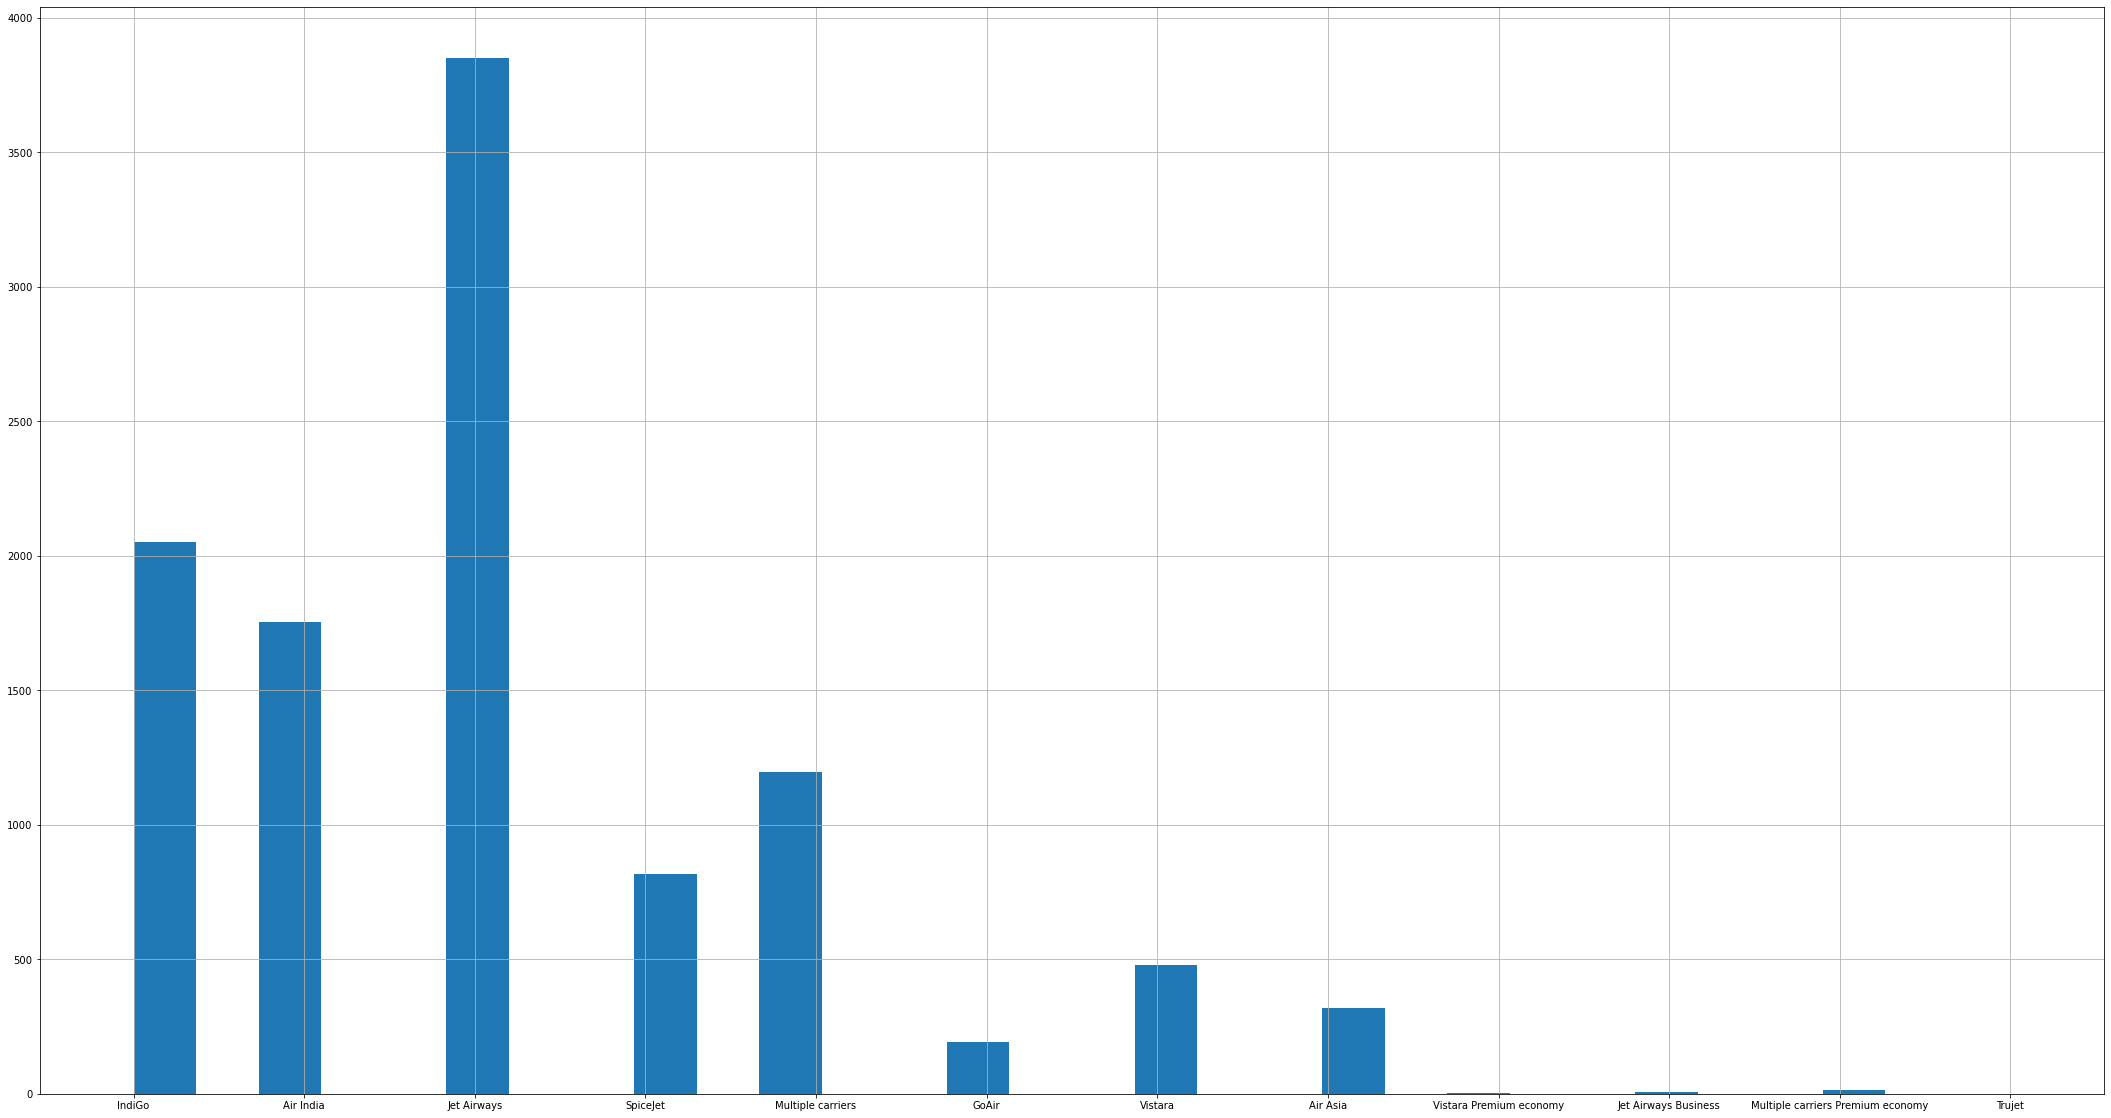

In [17]:
org_df['Airline'].hist(bins=30,figsize =(37,20))
plt.show()
#From the graph we see that Jet Airways the most common airline taken while Trujet is the least.

In [18]:
org_df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [19]:
org_df['Route'].nunique()

128

In [20]:
org_df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [21]:
org_df['Source'].nunique()

5

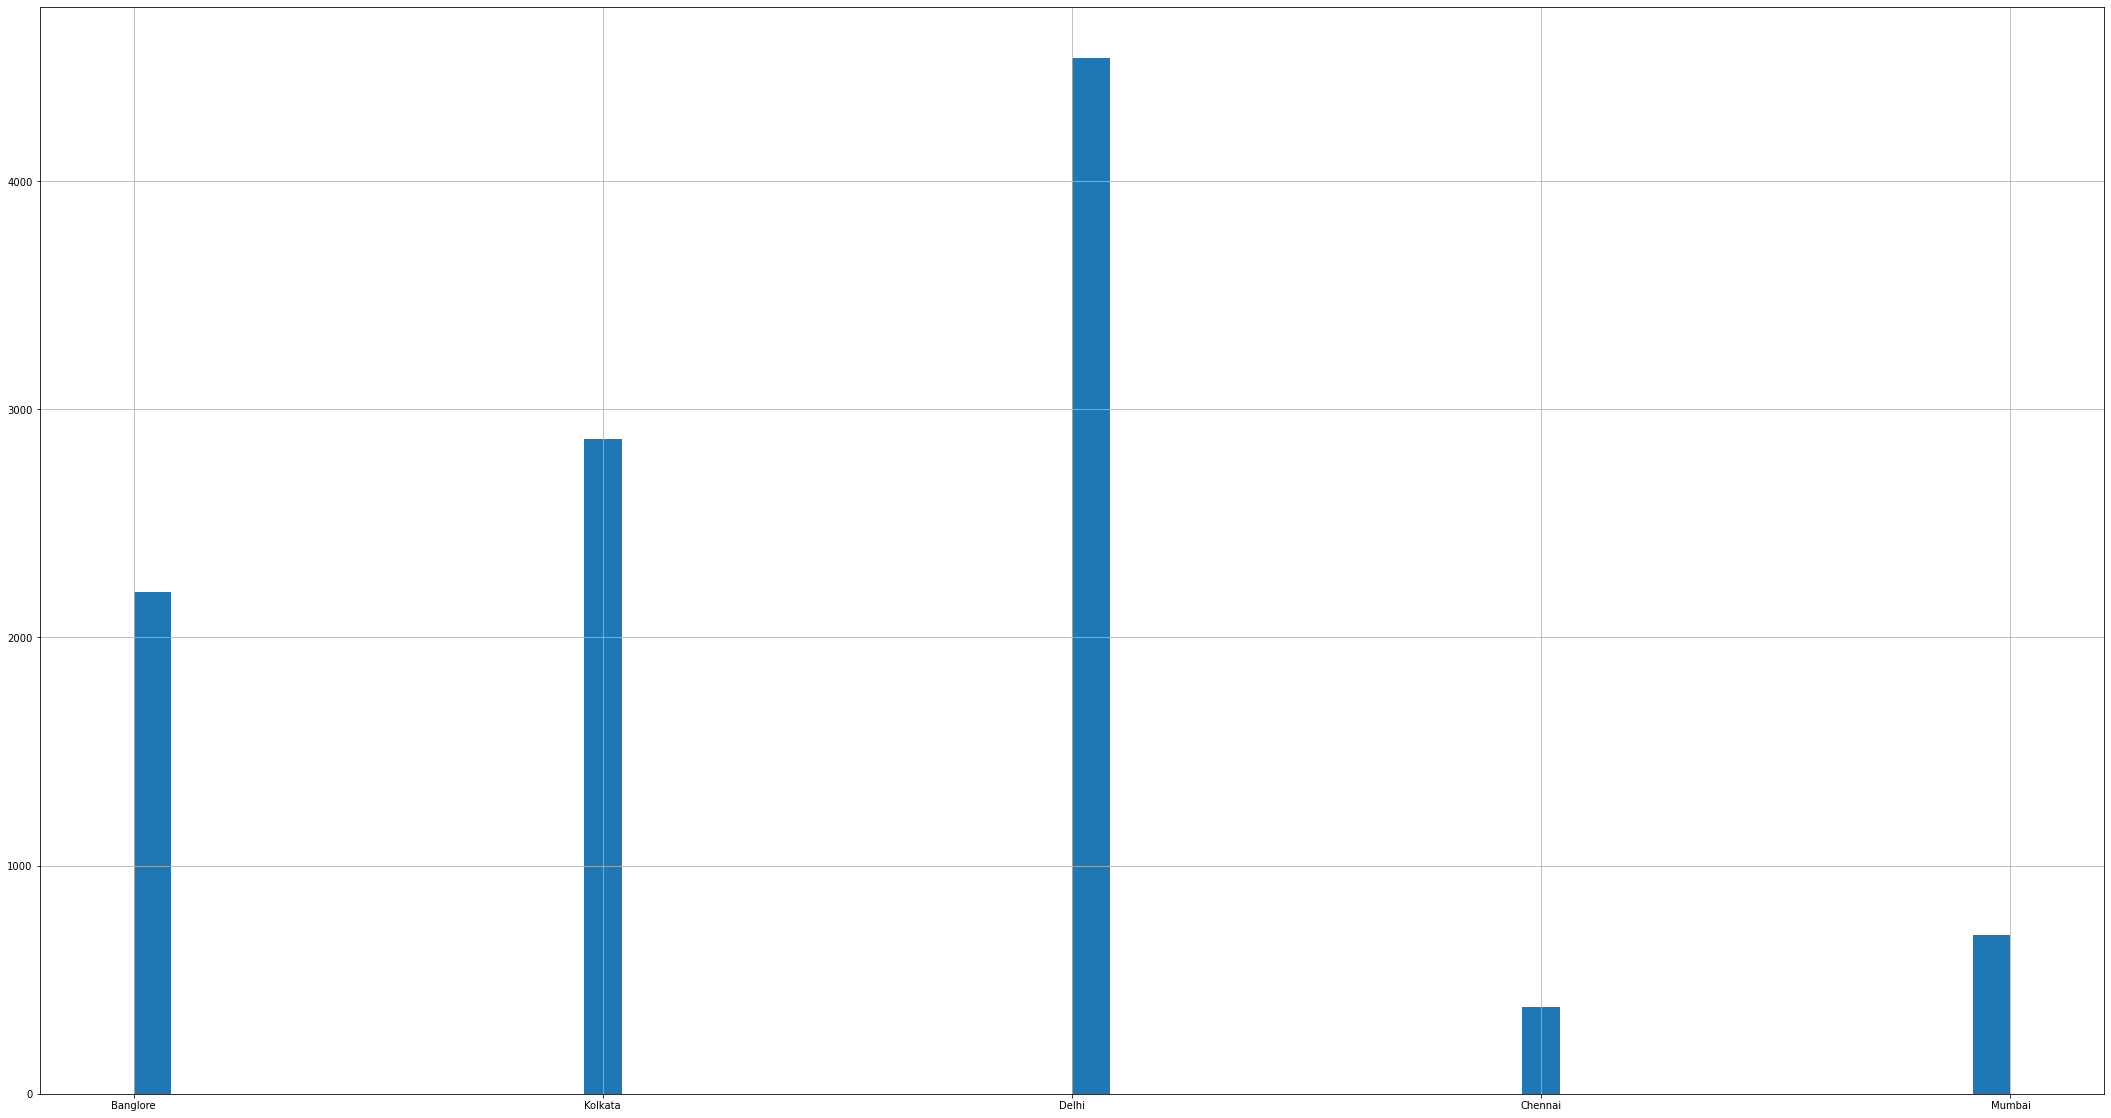

In [22]:
org_df['Source'].hist(bins=50,figsize =(37,20))
plt.show()
#From the graph we see that Delhi is the most common source while Chennai is the least frequent.

In [23]:
org_df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [24]:
org_df['Destination'].nunique()

6

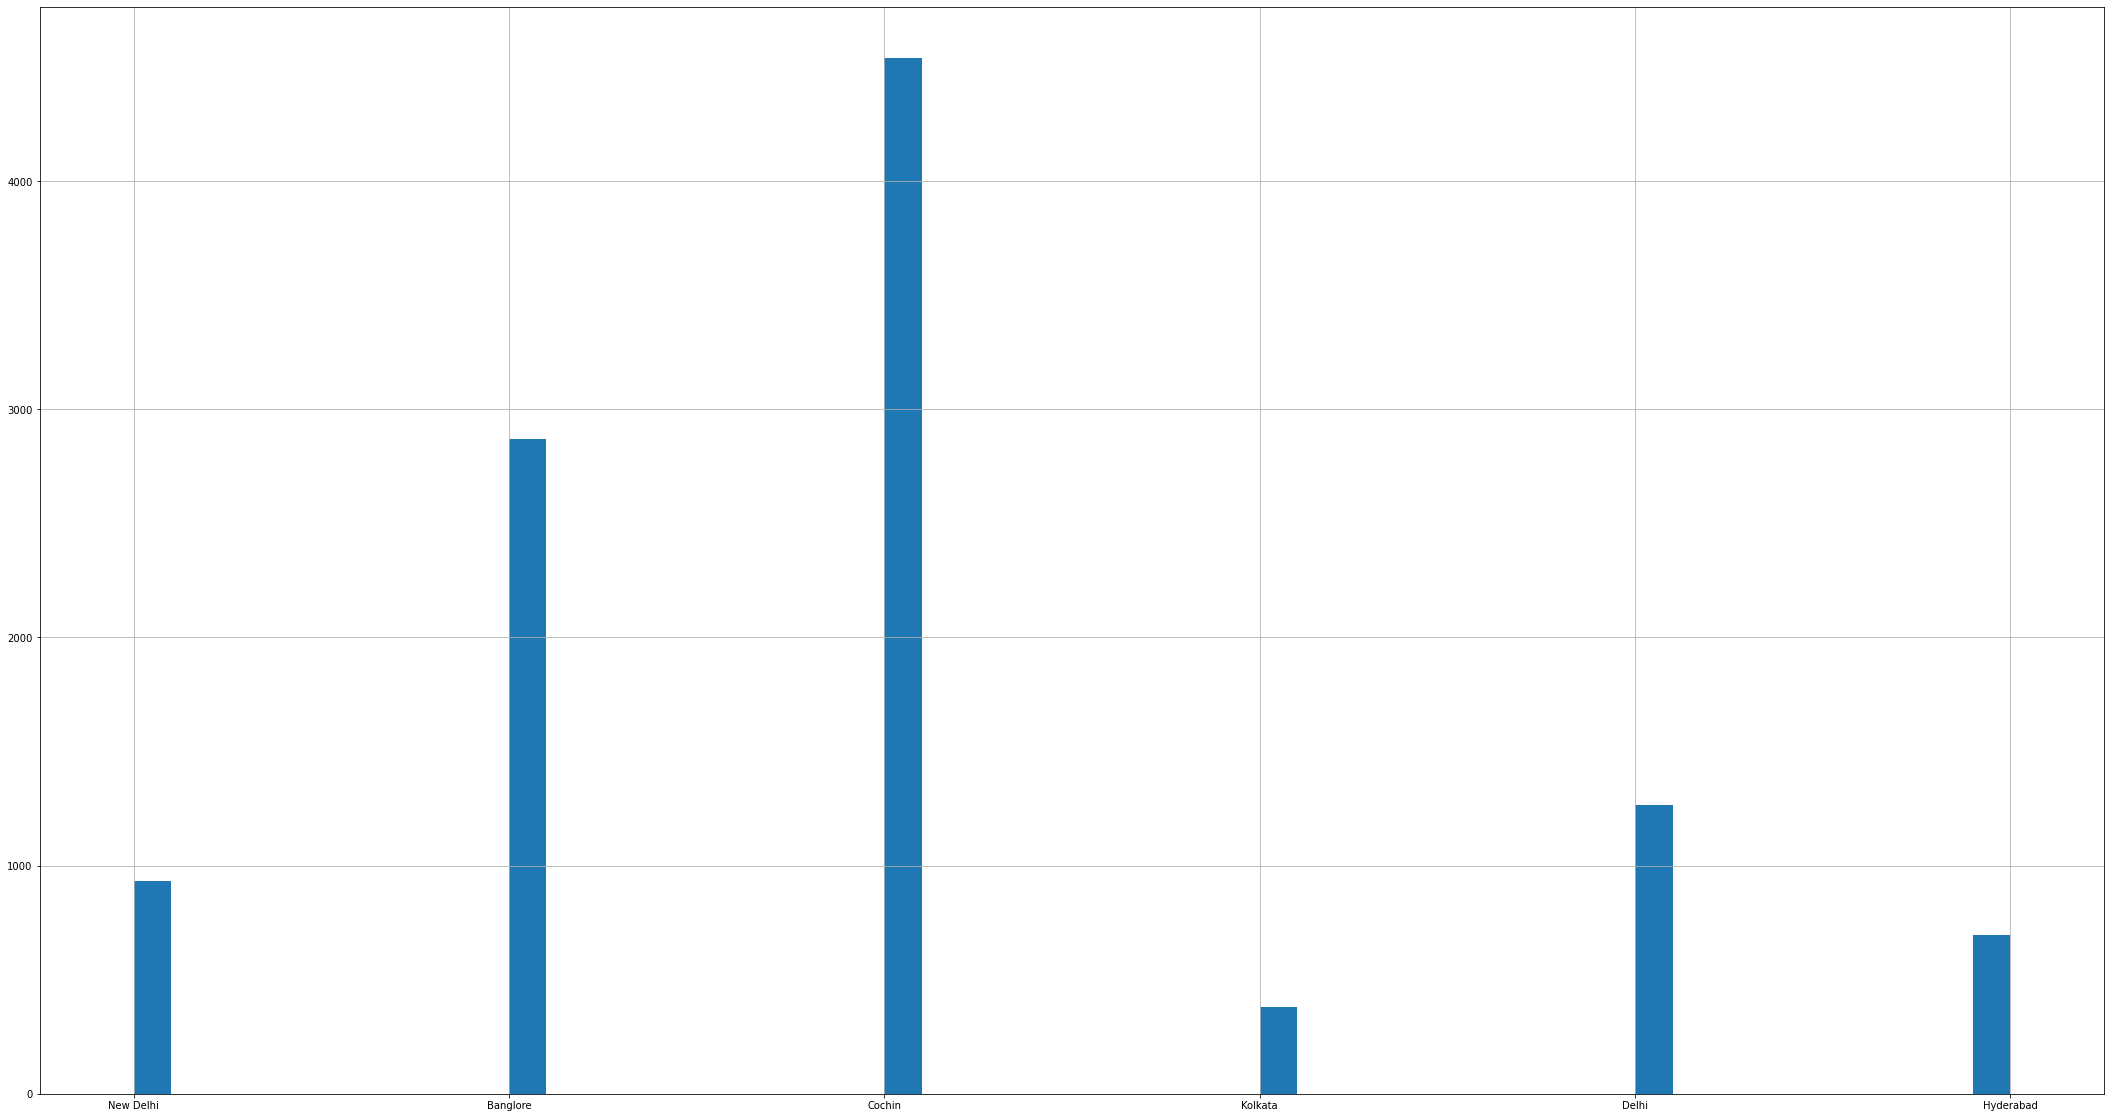

In [25]:
org_df['Destination'].hist(bins=50,figsize =(37,20))
plt.show()

In [26]:
org_df['journey_date'].nunique()

44

In [27]:
org_df['journey_date'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: journey_date, dtype: int64

In [28]:
dep_time = org_df['Dep_Time']
dep_time.nunique()

222

In [29]:
org_df['Arrival_Time'].nunique()

1343

In [30]:
org_df["Arrival_Time"].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [31]:
org_df['Dep_Time'].nunique()

222

In [32]:
org_df['Duration'].nunique()

368

In [33]:
org_df['Total_Stops'].nunique()

5

In [34]:
org_df['Price'].nunique()

1870

In [35]:
print(org_df['Price'].max(), " ", org_df['Price'].min(), " ", org_df['Price'].median())

79513   1760   8373.0


In [36]:
org_df["Dep_Time"].min()

'00:20'

In [37]:
org_df['Additional Info'].nunique()

10

In [38]:
org_df["Additional Info"].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional Info, dtype: int64

In [39]:
org_df["Total_Stops"].nunique()

5

In [40]:
alt_df["Date"].value_counts()  

20-May-87       1
15-Oct-09       1
4-Nov-09        1
3-Nov-09        1
2-Nov-09        1
               ..
4-Aug-98        1
3-Aug-98        1
31-Jul-98       1
30-Jul-98       1
Jan 25, 2021    1
Name: Date, Length: 8554, dtype: int64

In [41]:
alt_df["Date"].nunique()

8554

In [42]:
print(alt_df['Price'].max(), " ", alt_df['Price'].min(), " ", alt_df['Price'].median())

143.95   9.1   33.24


## Airfare Prediction Variable Dictionary:
- **Airline**: This is described as the aviation transportation company that the customers uses in order to travel to their desired destination. This is classified as a categorical variable as it describes the different airlines available. There are 12 levels present each revealing an airline. 
- **Route**: This is described as the route that the airline uses to arrive at the customers desired destination. This is classified as a categorical variable as it describes the unique route taken by the airplane. There are 128 levels present each revealing a different route taken by the airline.
- **Source**: This is describes as the home city from which the customers travel from. This is classified as a categorical variable and there are 5 levels present in the dataset, each describing the difference source cities.
- **Destination**: This is described as the destination city where the customers travel to. This is classified as a categorical variable and there are 6 levels present in the dataset, each describing the different destination cities.
- **Jounrey_date**: This is descibed as the date of which the flight travel takes place for the customer. It is a categorical variable and there are 44 levels present in the dataset.
- **Price**: This is described as the price for the plane ticket. It is a numerical variable and has a max of 79513, a minimum of 1760, and a median of 8373.
- **Arrival_Time**: This is described as the time when the plane will arrive at the customer's destination. It is a categorical variable and there are 1343 levels present in the dataset.
- **Dep_Time**: Time when the plane departs from the source city. This variable is categorical and contains 222 levels.
- **Duration**: Time it takes to get to destination from the source city.  This variable is a categorical variable and contains 368 unique levels.
- **Additional Info**: Information concerning details of the flight such as if there were any layovers, or the specific airport utilized by the airline. This is a categorical variable and it contains 10 unique levels.
- **Total_Stops**: Total amount of stops before arriving to destination city. This is a categorical variable and contains 5 levels.

## Brent Oil Prices Dictionary:
- **Date**: This is described as the current date of a corresponding oil price. It is a categorical variable and contains 8554 unique levels.
- **Price**: This is described as the price or cost of an oil barrel. It is a numerical variable and has a max of 143.95, a min of 9.1, and a median of 33.24


### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

## Strategy for merging data:
My strategy is to first change the format of both the "journey_date" from the Airfare Prediction dataset and the "Date" from the Bren Oil dataset into the same format. I will probably need to use pandas **To_datetime** method in order to convert the object dataypes. From there, I will create a function that iterates through both columns. If both dates match, the function will append an "Oil_Price" to that specific row of the Airfare dataset, if not, the function will continue iterating to find more matches.



In [43]:
org_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,journey_date
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898,24/03/2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663,1/05/2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883,9/06/2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219,12/05/2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303,01/03/2019


In [44]:
alt_df["Date"].nunique()
alt_df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [45]:
import datetime
num = 0
for i in alt_df["Date"]:
    try:
        word = datetime.datetime.strptime(i, "%d-%b-%y")
        i = word.strftime("%d/%m/%Y")
        alt_df.loc[num, "Date"] = i
        num = num + 1
    except ValueError:
        num = num + 1
        continue
#For loop changes all the Date variables into the same format as the format in journey date

In [46]:
org_df = org_df.rename(columns={'journey_date':'Date'})
org_df = pd.merge(org_df, alt_df, how='left',on='Date')
org_df.head()
#Merging the two datasets based on date

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price_x,Date,Price_y
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898,24/03/2019,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663,1/05/2019,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883,9/06/2019,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219,12/05/2019,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303,01/03/2019,63.71


In [47]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
#imputing the oil price dataset for null values

In [48]:
column = ["Price_y"]
org_df[column] = imputer.fit_transform(org_df[column])

In [49]:
imputer.statistics_

array([67.35])

In [50]:
org_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price_x,Date,Price_y
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898,24/03/2019,67.35
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663,1/05/2019,67.35
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883,9/06/2019,67.35
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219,12/05/2019,67.35
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303,01/03/2019,63.71


In [51]:
org_df = org_df.rename(columns={"Price_y" : "Oil_Price"})
org_df = org_df.rename(columns={"Price_x" : "Airline_Price"})
#Change the name of Price_x and Price_y to its respected names

In [52]:
org_df.info()
org_df.isnull().sum()
#We can see that all the values match up and that there are no longer any null values present within the merged dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Source           10683 non-null  object 
 2   Destination      10683 non-null  object 
 3   Route            10682 non-null  object 
 4   Dep_Time         10683 non-null  object 
 5   Arrival_Time     10683 non-null  object 
 6   Duration         10683 non-null  object 
 7   Total_Stops      10682 non-null  object 
 8   Additional Info  10683 non-null  object 
 9   Airline_Price    10683 non-null  int64  
 10  Date             10683 non-null  object 
 11  Oil_Price        10683 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1.1+ MB


Airline            0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional Info    0
Airline_Price      0
Date               0
Oil_Price          0
dtype: int64

In [53]:
org_df = org_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
org_df.info()
#Check to make sure the dataframe merged properly and also drop any missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10682 non-null  object 
 4   Dep_Time         10682 non-null  object 
 5   Arrival_Time     10682 non-null  object 
 6   Duration         10682 non-null  object 
 7   Total_Stops      10682 non-null  object 
 8   Additional Info  10682 non-null  object 
 9   Airline_Price    10682 non-null  int64  
 10  Date             10682 non-null  object 
 11  Oil_Price        10682 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 1.1+ MB


### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

## Variables Chosen:

>1. Date(Predictor variable)
      * Chose this variable because the date of the flight could ultimately impact the flight price.
      * Ex: Flights during holidays such as Christmas and Thanksgiving are more expensive than flights during January - April
      
>2. Duration(Predictor variable)
      * Chose this variable as a predictor because I believe the longer a flight takes to arrive at the destination, the higher the price of the airline flight

>3. Total Stops(Predictor variable)
      * Layover flights are usually cheaper than direct flights so I believed that the more stops there are, the cheaper the flight may be

>4. Airline(Predictor variable)
      * Chose this because an airline that has a better reputation may be more expensive than one that is not as well known

>5. Departure Time(Predictor variable)
      * Flights that are later in the day are may be more expensive than ones in the early mornings so I decided this variable may be a useful element for the ml algorithm

>6. Oil Price(Predictor Variable)
      * If the oil price at the time of the flight is more expensive, I belive that would reflect in the airline flight as the planes will pay a premium on fuel.

>7. Price(Target variable)
     * Chose this as a target variable because I felt it would be interesting to see the realtionships between an airline ticket and outside components that the common customer would not realize.

In [54]:
train_data = org_df.copy()
#creating the training dataset

In [55]:
train_data.head()
#Check to make sure the train_data copied all the contents of the original dataframe

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Airline_Price,Date,Oil_Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898,24/03/2019,67.35
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663,1/05/2019,67.35
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883,9/06/2019,67.35
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219,12/05/2019,67.35
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303,01/03/2019,63.71


We can see that Date, Dep_Time and Arrival_Time are all object types, therefore we need to convert them into a different form to use the columns for prediction

In [56]:
#Breaking Date variable into two different columns for the algorithm to better understand the data
train_data["Journey_Day"] = pd.to_datetime(train_data["Date"], format="%d/%m/%Y").dt.day
train_data["Journey_Month"] = pd.to_datetime(train_data["Date"], format = "%d/%m/%Y").dt.month

In [57]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Airline_Price,Date,Oil_Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898,24/03/2019,67.35,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663,1/05/2019,67.35,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883,9/06/2019,67.35,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219,12/05/2019,67.35,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303,01/03/2019,63.71,1,3


In [58]:
train_data.drop(["Date"], axis = 1, inplace = True)

In [59]:
train_data["Dep_Hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_Min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [60]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional Info,Airline_Price,Oil_Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3898,67.35,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7663,67.35,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13883,67.35,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6219,67.35,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13303,63.71,1,3,16,50


In [61]:
train_data["Arrival_Hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour
train_data["Arrival_Min"] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute

In [62]:
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [63]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional Info,Airline_Price,Oil_Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3898,67.35,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7663,67.35,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13883,67.35,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6219,67.35,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13303,63.71,1,3,16,50,21,35


In [64]:
d = list(train_data["Duration"])
for i in range(len(d)):
    if len(d[i].split()) != 2:
        if "h" in d[i]:
            d[i] = d[i].strip() + " 0m"
        else:
            d[i] = "0h " + d[i]
d_hours = []
d_minutes = []
for j in range(len(d)):
    d_hours.append(int(d[i].split(sep = "h")[0]))
    d_minutes.append(int(d[i].split(sep = "m")[0].split()[-1])) 

In [65]:
train_data["Duration_Hours"] = d_hours
train_data["Duration_Mintues"] = d_minutes

In [66]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [67]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional Info,Airline_Price,Oil_Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mintues
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3898,67.35,24,3,22,20,1,10,8,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7663,67.35,1,5,5,50,13,15,8,20
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13883,67.35,9,6,9,25,4,25,8,20
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6219,67.35,12,5,18,5,23,30,8,20
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13303,63.71,1,3,16,50,21,35,8,20


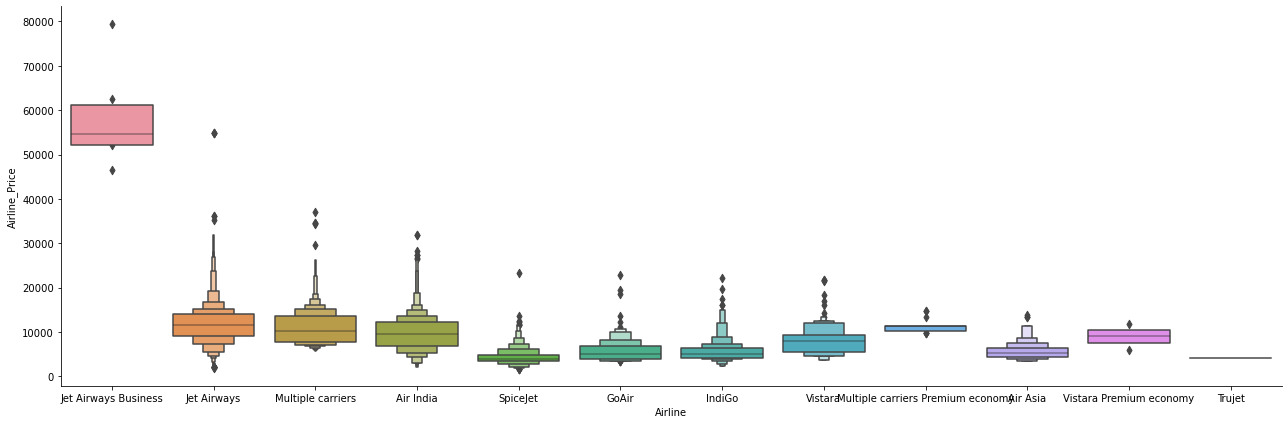

In [68]:
sns.catplot(y = "Airline_Price", x = "Airline", data = train_data.sort_values("Airline_Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()
#We can see from this graph that Jet Airyways Business is the most expensive airline while spicejet is the cheapest. This could be a great indication of what the the airline price will be depending on the airline taken

In [69]:
#Performed OneHotEncoding on this categorical variable in order for the model to better understand it
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

In [70]:
#Dropping all the variables I no longer need for prediction
train_data.drop(["Route", "Airline","Additional Info", "Route", "Source", "Destination"], axis = 1, inplace = True)

In [71]:
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [72]:
train_data.head()

,Total_Stops,Airline_Price,Oil_Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mintues
0,0,3898,67.35,24,3,22,20,1,10,8,20
1,2,7663,67.35,1,5,5,50,13,15,8,20
2,2,13883,67.35,9,6,9,25,4,25,8,20
3,1,6219,67.35,12,5,18,5,23,30,8,20
4,1,13303,63.71,1,3,16,50,21,35,8,20


In [73]:
train_data = pd.concat([train_data, Airline], axis = 1)

In [74]:
train_data.head()

,Total_Stops,Airline_Price,Oil_Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,3898,67.35,24,3,22,20,1,10,8,...,0,1,0,0,0,0,0,0,0,0
1,2,7663,67.35,1,5,5,50,13,15,8,...,0,0,0,0,0,0,0,0,0,0
2,2,13883,67.35,9,6,9,25,4,25,8,...,0,0,1,0,0,0,0,0,0,0
3,1,6219,67.35,12,5,18,5,23,30,8,...,0,1,0,0,0,0,0,0,0,0
4,1,13303,63.71,1,3,16,50,21,35,8,...,0,1,0,0,0,0,0,0,0,0


In [75]:
#Finding correlations between the different attributes
train_data.corr()

,Total_Stops,Airline_Price,Oil_Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
Total_Stops,1.000000,0.603897,-0.034005,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,NaN,...,-0.060110,-0.302991,0.215063,0.017876,0.118399,0.009089,-0.274351,0.002519,-0.120447,-0.020459
Airline_Price,0.603897,1.000000,-0.099865,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,NaN,...,-0.095151,-0.361070,0.416124,0.253303,0.139793,0.017650,-0.296565,-0.010381,-0.060654,-0.000454
Oil_Price,-0.034005,-0.099865,1.000000,0.165733,-0.113118,0.013920,-0.037929,0.010555,0.011817,NaN,...,0.011900,0.021377,-0.057486,-0.025681,0.018827,0.012288,0.026067,-0.000501,0.010927,-0.000868
Journey_Day,-0.009451,-0.153774,0.165733,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,NaN,...,-0.003122,0.007281,-0.017304,-0.031713,0.042163,0.030839,0.022154,-0.008569,-0.013169,-0.020115
Journey_Month,0.054383,-0.103643,-0.113118,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,NaN,...,-0.004494,-0.048504,0.059735,-0.034787,0.053685,-0.051222,-0.011977,-0.014199,-0.017252,-0.019797
Dep_Hour,-0.061476,0.006799,0.013920,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,NaN,...,-0.016373,-0.023395,0.113942,-0.007524,-0.149992,-0.028672,-0.010451,0.000857,0.023906,-0.003375
Dep_Min,-0.002618,-0.024458,-0.037929,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,NaN,...,0.076751,-0.014714,0.024455,0.009168,-0.109370,-0.004624,0.092634,-0.010007,-0.077903,-0.011380
Arrival_Hour,0.038140,0.024244,0.010555,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,NaN,...,0.018526,-0.071491,-0.027377,-0.014456,0.067930,0.013491,-0.090058,0.003739,0.068834,0.000776
Arrival_Min,-0.106940,-0.086155,0.011817,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,NaN,...,0.096839,0.035124,-0.057698,0.005232,-0.167455,-0.001786,0.012543,-0.002750,0.069422,0.000314
Duration_Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
train_data.shape

(10682, 22)

In [77]:
train_data.columns

Index(['Total_Stops', 'Airline_Price', 'Oil_Price', 'Journey_Day',
       'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min',
       'Duration_Hours', 'Duration_Mintues', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [78]:
X = train_data.loc[:,['Total_Stops', 'Airline_Price', 'Oil_Price', 'Journey_Day',
       'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min',
       'Duration_Hours', 'Duration_Mintues', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara']]

In [79]:
X.head()

,Total_Stops,Airline_Price,Oil_Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mintues,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara
0,0,3898,67.35,24,3,22,20,1,10,8,20,0,0,1,0,0,0,0,0,0
1,2,7663,67.35,1,5,5,50,13,15,8,20,1,0,0,0,0,0,0,0,0
2,2,13883,67.35,9,6,9,25,4,25,8,20,0,0,0,1,0,0,0,0,0
3,1,6219,67.35,12,5,18,5,23,30,8,20,0,0,1,0,0,0,0,0,0
4,1,13303,63.71,1,3,16,50,21,35,8,20,0,0,1,0,0,0,0,0,0


In [80]:
Y = train_data.iloc[:, 1]
Y.head()

0     3898
1     7663
2    13883
3     6219
4    13303
Name: Airline_Price, dtype: int64

In [81]:
from sklearn.ensemble import ExtraTreesRegressor
regressor = ExtraTreesRegressor()
regressor.fit(X, Y)

ExtraTreesRegressor()

In [1]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(regressor.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()
#Here we see that the most relevant data attributes are total stops and airlines while the least are duration
# There is a positive correlation bewteen the most relevant data attributes and the airline price

NameError: name 'plt' is not defined

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [84]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [85]:
Y_pred = reg_rf.predict(X_test)

In [86]:
from sklearn import metrics
acc = np.sum(np.equal(Y_test, Y_pred)) / len(Y_test)
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('Accuracy:', acc)

MAE: 2.8621899859616344
MSE: 1488.0336489471263
RMSE: 38.575039195665454
Accuracy: 0.5100608329433786


In [87]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [88]:
pred = tree.predict(X_test)
acc = np.sum(np.equal(Y_test, pred)) / len(Y_test)

In [89]:
print('MAE:', metrics.mean_absolute_error(Y_test,pred))
print('MSE:', metrics.mean_squared_error(Y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,pred)))
print('Accuracy:', acc)
#It seems like the DecisionTreeRegressor was more accurate than the RandomForestRegressor; however, the random regressor has a lower margin of error on average when it comes to predicting values

MAE: 4.26626111371081
MSE: 11811.7084698175
RMSE: 108.68168415063091
Accuracy: 0.8685072531586336
